# Assignment1 Task1 - Perceptron

## Generate Data
In this section, training data and test data are generated according to the given _mean_ and _covariance_. The parameter _show_ controls the output of data distribution.

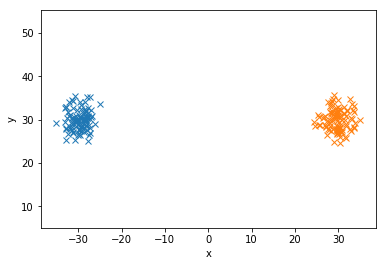

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import perceptron as pt
def genData(mean1, cov1, mean2, cov2, num1, num2, show = 1):
    #mean = [-5, 5]
    #cov = [[5,0],[0,5]]
    x, y = np.random.multivariate_normal(mean1, cov1, num1).T
    if(show > 0):
        plt.plot(x, y, 'x')
        plt.axis('equal')
    data1 = []
    for i in range(100):
        data1.append([[x[i],y[i]],1])
    
    x, y = np.random.multivariate_normal(mean2, cov2, num2).T
    if(show > 0):
        plt.plot(x, y, 'x')
        plt.axis('equal')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()
        
    data2 = []  
    for i in range(100):
        data2.append([[x[i],y[i]],-1])

    np.random.shuffle(data1)
    np.random.shuffle(data2)
    dataTr =[]
    dataTr += data1[:80]
    dataTr += data2[:80]
    
    dataTest = []
    dataTest += data1[80:]
    dataTest += data2[80:]
    return dataTr, dataTest

dataTr, dataTest = genData([-30,30],[[5,0],[0,5]],[30,30],[[5,0],[0,5]],100,100)


## Train & Test the Perceptrpn
Now that training data and test data are well prepared, let train and test our perceptron. 
The test method takes in three parameters: the distance, covariance and image output control. 

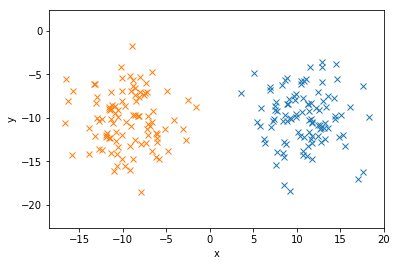

test: 160 / 40
test: 100.0 %
train: 160 / 160
train: 100.0 %


(100.0, 100.0)

In [3]:
import matplotlib.pyplot as plt
def test(distance, variance, show):
    mean1 = [distance, -distance]
    cov1 = [[variance,0],[0, variance]]
    mean2 = [-distance, -distance]
    cov2 = [[variance,0],[0, variance]]
    dataTr, dataTest = genData(mean1, cov1, mean2, cov2, 100, 100, show)
    _perceptron = pt.Perceptron(2)
    vectors = []
    labels = []
    for i in range(len(dataTr)):
        vectors.append(dataTr[i][0])
        labels.append(dataTr[i][1])

    for i in range(200):
        _perceptron.train(vectors, labels)

    correct = 0
    for i in range(len(dataTest)):
        result = _perceptron.forward(dataTest[i])
        if(result == dataTest[i][1]):
            correct += 1
    
    teAc = correct*100/len(dataTest)
  
    correct = 0
    for i in range(len(dataTr)):
        result = _perceptron.forward(dataTr[i])
        if(result == dataTr[i][1]):
            correct += 1
    trAc = correct*100/len(dataTr)
    
    if(show):
        print("test:",correct,'/',len(dataTest))
        print("test:", teAc,'%')
        print("train:",correct,'/',len(dataTr))
        print("train:", trAc,'%')
    return trAc, teAc
test(10,10, 1)


## Examine Different Parameters
Let's now play with different distance and variance values. As is shown in the following block, a higher distance and lower variance lead to better performance.

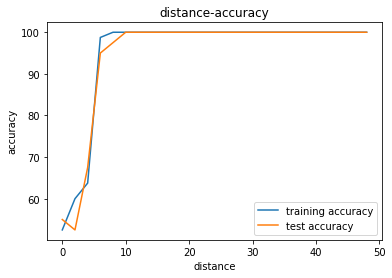

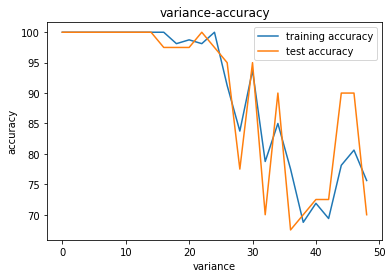

In [7]:
trAcs = []
teAcs = []
for distance in range (0, 50, 2):
    trAc, teAc = test(distance, 10, 0)
    trAcs.append(trAc)
    teAcs.append(teAc)
plt.plot(range(0,50,2),trAcs, label = "training accuracy")
plt.plot(range(0,50,2),teAcs, label = "test accuracy")
plt.legend(loc="best")
plt.xlabel("distance")
plt.ylabel("accuracy")
plt.title("distance-accuracy")
plt.show()
plt.cla()

trAcs = []
teAcs = []
for variance in range (0, 50, 2):
    trAc, teAc = test(10, variance, 0)
    trAcs.append(trAc)
    teAcs.append(teAc)
plt.plot(range(0,50,2),trAcs, label = "training accuracy")
plt.plot(range(0,50,2),teAcs, label = "test accuracy")
plt.legend(loc="best")
plt.xlabel("variance")
plt.ylabel("accuracy")
plt.title("variance-accuracy")
plt.show()